# Linear Regression Assignment

## Bike Sharing Assignment

In [135]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt
import calendar

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [136]:
#Reading data
data = pd.read_csv('day.csv')

In [137]:
#Head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [138]:
#Shape of data
data.shape

(730, 16)

In [139]:
#Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [140]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [141]:
#Data types of features
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Data Visualisation

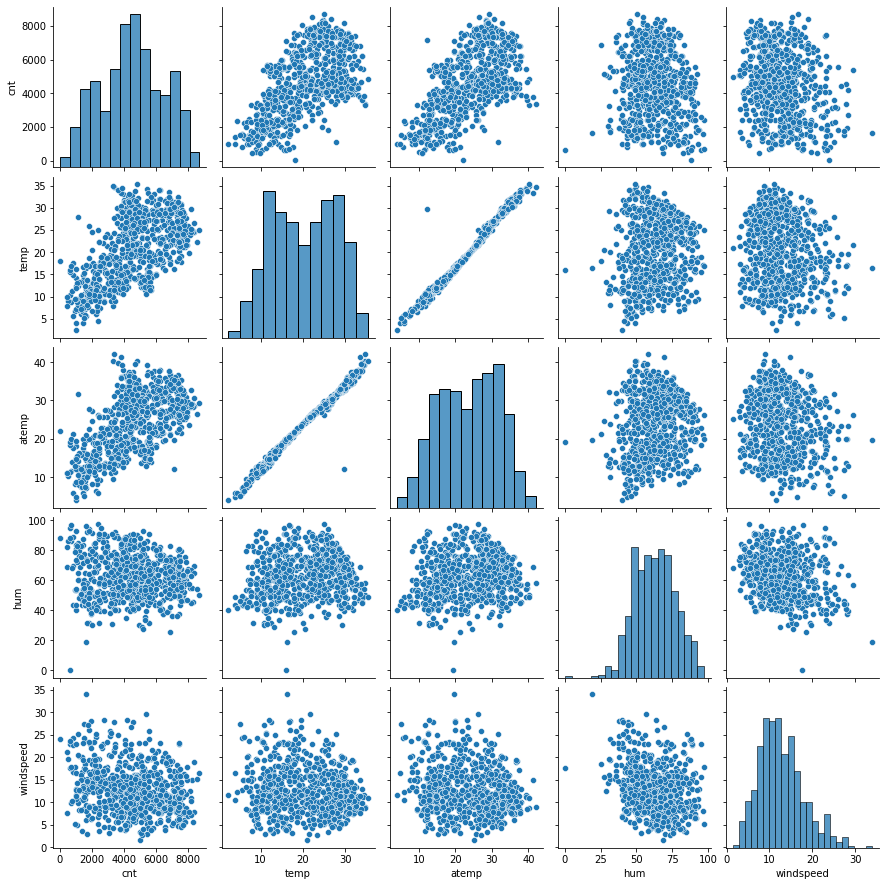

In [142]:
#Pairplot for numeric features
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

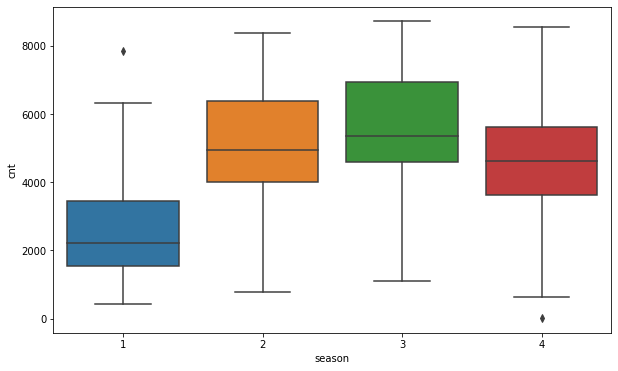

In [143]:
#Boxplot for season and cnt
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.show()

### Observation
The count of bike sharing is least for spring and most in fall

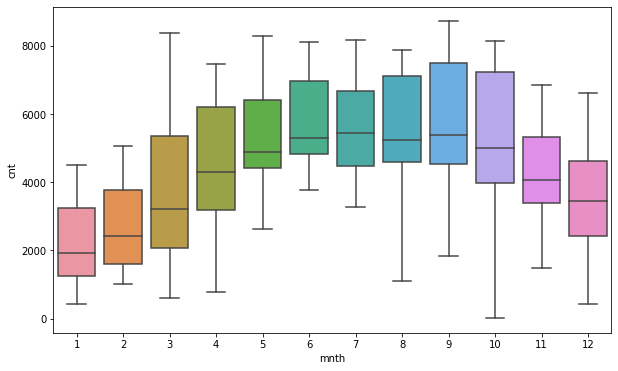

In [144]:
#Boxplot for month and cnt
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.show()

### Observation
The count of bike sharing increases in summer months

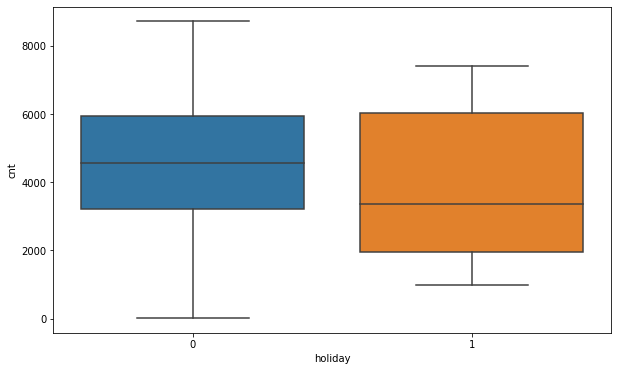

In [145]:
#Boxplot for holiday and cnt
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.show()

### Observation
The count of bike sharing is less during holidays

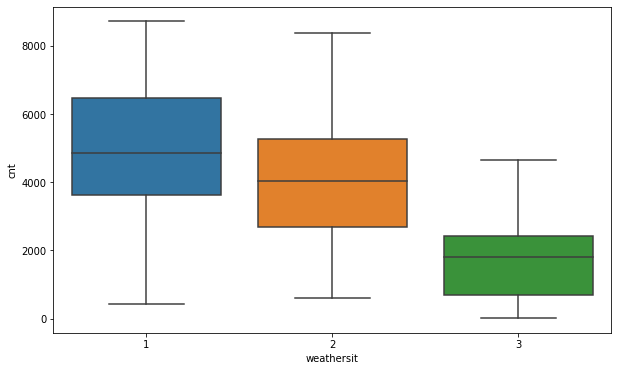

In [146]:
#Boxplot for weathersit and cnt
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

### Observation
The count of bike sharing highest when weather is Clear, Few clouds, Partly cloudy, Partly cloudy and zero when weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

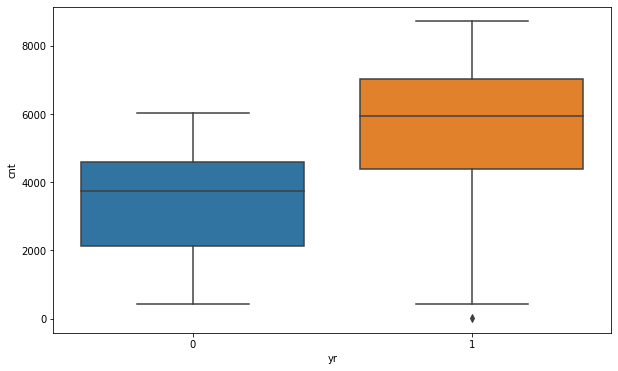

In [147]:
#Boxplot for year and cnt
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.show()

### Observation
The count of bike sharing increased in 2019

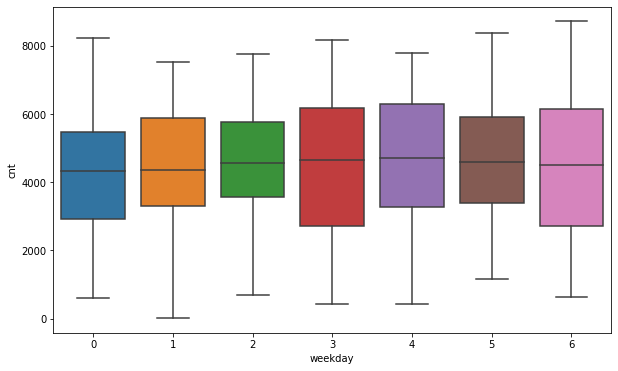

In [148]:
#Boxplot for weekday and cnt
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.show()

### Observation
The count of bike sharing during weekday is quite same i.e no relation

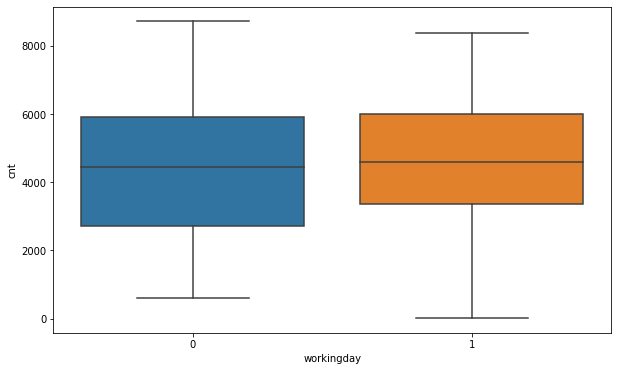

In [149]:
#Boxplot for workingday and cnt
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()

## Data Preparation

In [150]:
#Dropping columns that are irrelevant for the model building
data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [151]:
#Converting month numeric values to categorical values
data['mnth'] = data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [152]:
#Mapping seasons, weathersit and weekdays values
data.season = data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
data.weekday = data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [153]:
#Head of the new dataset
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [154]:
#Creating dummy variables for season , mnth ,weathersit ,weekday
dummy = data[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )

In [155]:
#Adding dummy variables to original dataset
data = pd.concat([dummy,data],axis = 1)

In [156]:
data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [157]:
#Dropping columns for which dummy variables were created
data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [158]:
data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [159]:
data.shape

(730, 30)

In [160]:
#Splitting the Data into Training and Testing Set
train, test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [161]:
#Rescaling the Features 
scaler = MinMaxScaler()

#Apply scaler to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [162]:
#Head of train data
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [163]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


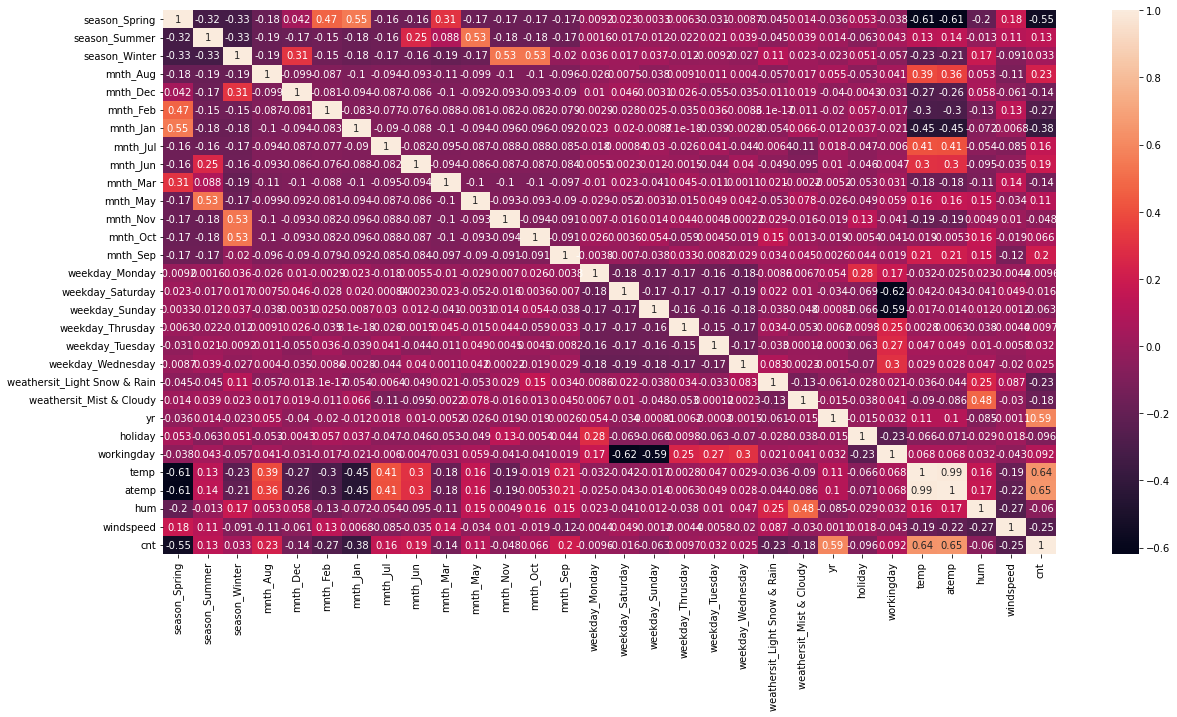

In [164]:
#Correlation coefficients
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [165]:
#Defining X_train and y_train
y_train = train.pop('cnt')
X_train = train

In [166]:
#Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

#Running RFE
rfe = RFE(lm, 13)             
rfe = rfe.fit(X_train, y_train)

In [167]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', False, 7),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 15),
 ('mnth_Nov', False, 6),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 17),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', False, 2),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1)]

## Model 1

In [168]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow & Rain',
       'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [169]:
X_train.columns[~rfe.support_]

Index(['season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Monday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Mist & Cloudy', 'atemp'],
      dtype='object')

In [170]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [171]:
#Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [172]:
#Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [173]:
#Check the parameters obtained
lm.params

const                           0.277770
season_Spring                  -0.100025
season_Winter                   0.066644
mnth_Jul                       -0.078512
mnth_Sep                        0.058348
weekday_Saturday                0.109293
weekday_Sunday                  0.063203
weathersit_Light Snow & Rain   -0.202446
yr                              0.228267
holiday                         0.004516
workingday                      0.100758
temp                            0.514117
hum                            -0.269233
windspeed                      -0.188450
dtype: float64

In [174]:
#Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.25e-184
Time:                        22:30:22   Log-Likelihood:                 495.55
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     497   BIC:                            -910.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [175]:
#Dropping weekday_Saturday since it has p > 0.05
X_train_new = X_train_rfe.drop(["weekday_Saturday"], axis = 1)

## Model 2

In [176]:
#Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [177]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [178]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.25e-184
Time:                        22:30:23   Log-Likelihood:                 495.55
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     497   BIC:                            -910.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3871      0.032     12.085      0.000       0.324       0.450
season_Spring                   -0.1000      0.015     -6.564      0.000      -0.130      -0.070
season_Winter                    0.0666      0.013      5.305      0.000       0.042       0.091
mnth_Jul                        -0.0785      0.018     -4.461      0.000      -0.113      -0.044
mnth_Sep                         0.0583      0.016      3.668      0.000       0.027       0.090
weekday_Sunday                  -0.0461      0.015     -3.052      0.002      -0.076      -0.016
weathersit_Light Snow & Rain    -0.2024      0.026     -7.896      0.000      -0.253      -0.152
yr                               0.2283      0.008     27.370      0.000       0.212       0.245
holiday                         -0.1048      0.028     -3.755      0.000      -0.160      -0.050
workingday                      -0.0085      0.012     -0.735      0.463      -0.031       0.014
temp                             0.5141      0.031     16.678      0.000       0.454       0.575
hum                             -0.2692      0.032     -8.503      0.000      -0.331      -0.207
windspeed                       -0.1884      0.026     -7.248      0.000      -0.240      -0.137
==============================================================================
Omnibus:                       55.776   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.946
Skew:                          -0.632   Prob(JB):                     2.98e-25
Kurtosis:                       4.928   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
#Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.79
10,temp,2.87
1,season_Spring,2.53
2,season_Winter,1.75
9,workingday,1.75
5,weekday_Sunday,1.66
3,mnth_Jul,1.30
11,hum,1.26
8,holiday,1.15
12,windspeed,1.15


In [180]:
#We want a VIF that is less than 5.Hence droping 'const'
X_train_new = X_train_new.drop(['const'], axis=1)

In [181]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,16.40
9,temp,13.66
8,workingday,5.00
11,windspeed,4.07
0,season_Spring,2.46
6,yr,2.07
1,season_Winter,2.00
4,weekday_Sunday,1.86
2,mnth_Jul,1.40
3,mnth_Sep,1.20


## Model 3 (Final model)

In [182]:
#Dropping hum from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

In [183]:
#Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

#Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [184]:
#Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     192.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.47e-171
Time:                        22:30:23   Log-Likelihood:                 460.92
No. Observations:                 510   AIC:                            -897.8
Df Residuals:                     498   BIC:                            -847.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [185]:
#Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,6.73
8,workingday,4.65
10,windspeed,4.06
6,yr,2.06
0,season_Spring,1.85
4,weekday_Sunday,1.78
1,season_Winter,1.49
2,mnth_Jul,1.35
3,mnth_Sep,1.20
7,holiday,1.15


## Residual Analysis of the train data

In [186]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

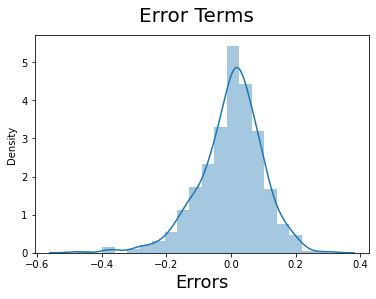

In [187]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                       

In [188]:
#Making Predictions Using the Final Model
num_vars = ['cnt','hum','windspeed','temp','atemp']
test[num_vars] = scaler.transform(test[num_vars])

In [189]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [190]:
#Dividing into X_test and y_test
y_test = test.pop('cnt')
X_test = test

In [191]:
#Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [192]:
#Predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]

#Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Winter                 219 non-null    uint8  
 3   mnth_Jul                      219 non-null    uint8  
 4   mnth_Sep                      219 non-null    uint8  
 5   weekday_Sunday                219 non-null    uint8  
 6   weathersit_Light Snow & Rain  219 non-null    uint8  
 7   yr                            219 non-null    int64  
 8   holiday                       219 non-null    int64  
 9   workingday                    219 non-null    int64  
 10  temp                          219 non-null    float64
 11  windspeed                     219 non-null    float64
dtypes: float64(3), int64(3), uint8(6)
memory usage: 13.3 KB


In [193]:
#Making predictions
y_pred = lm.predict(X_test)

In [194]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7913006336272719

In [195]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009912345066324796

## Model Evaluation

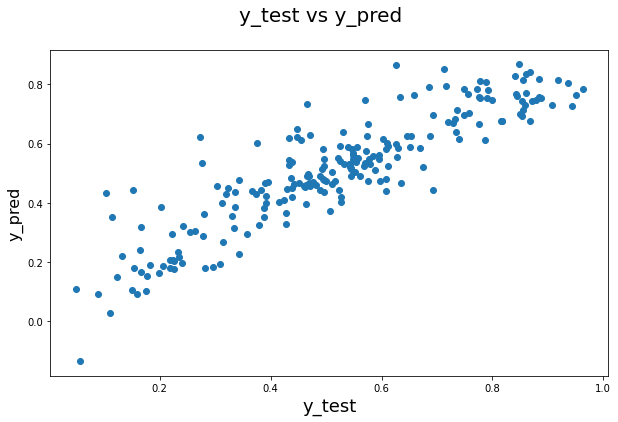

In [196]:
#Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

In [197]:
#Parameters
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.475873
7,yr,0.235183
0,const,0.219481
2,season_Winter,0.051974
4,mnth_Sep,0.048443
9,workingday,-0.011699
5,weekday_Sunday,-0.051359
3,mnth_Jul,-0.059835
8,holiday,-0.101957


## Obsevations
- All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
- All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.
- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays